### Load prediction data

In [5]:
import pandas as pd
predictions = pd.read_csv("./data/predictions.csv")
predictions.head()

,label,predReg,predGbt
0,0,3.482221e-12,0.004599
1,0,5.931836e-05,0.005975
2,0,2.187130e-02,0.027379
3,0,5.470528e-05,0.005071
4,0,1.706345e-06,0.005838


### Roc construction

In [8]:
def rocPoints(classifier):
    positives = predictions[predictions.label == 1].shape[0]
    negatives = predictions[predictions.label == 0].shape[0]
    fprPoints = [0]
    tprPoints = [0]
    sortedPred = predictions[classifier].sort_values(ascending = False)
    for p in sortedPred:
        aboveThreshold = predictions[predictions[classifier] >= p].label # get part of df above p
        tpr = aboveThreshold[aboveThreshold == 1].shape[0] / float(positives)
        fpr = aboveThreshold[aboveThreshold == 0].shape[0] / float(negatives)
        fprPoints.append(fpr)
        tprPoints.append(tpr)
    return fprPoints, tprPoints

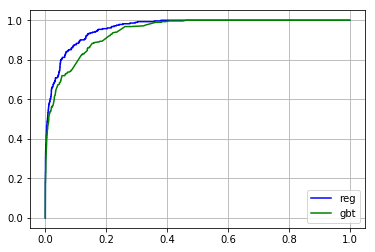

In [10]:
fpr_reg, tpr_reg =  rocPoints("predReg")
fpr_gbt, tpr_gbt =  rocPoints("predGbt")

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg")
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt")
plt.legend()
plt.grid()
plt.show()

### Roc from library

/Users/pbaier/anaconda3/envs/fraud_detector/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/pbaier/anaconda3/envs/fraud_detector/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/pbaier/anaconda3/envs/fraud_detector/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/pbaier/anaconda3/envs/fraud_detector/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


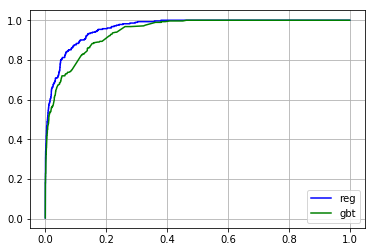

In [11]:
from sklearn.metrics import roc_curve
fpr_reg, tpr_reg, _ =  roc_curve(predictions["label"], predictions["predReg"])
fpr_gbt, tpr_gbt, _ =  roc_curve(predictions["label"], predictions["predGbt"])

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg")
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt")
plt.legend()
plt.grid()
plt.show()

### AUC Calculation

In [12]:
# doing it the numpy way
import numpy as np
from numpy import trapz

y = np.array(tpr_reg)
x = np.array(fpr_reg)

# Compute the area using the composite trapezoidal rule.
trapz(y, x)

0.9633125396173768

In [13]:
# doing it the sklearn way
from sklearn.metrics import auc
auc(fpr_reg, tpr_reg)

0.9633125396173768